In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import ensemble
from sklearn import gaussian_process
from sklearn import linear_model
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import svm
from sklearn import tree
from sklearn import discriminant_analysis
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

import xgboost as xgb
from xgboost import XGBClassifier
MLA = [
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    gaussian_process.GaussianProcessClassifier(),
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(), 
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    neighbors.KNeighborsClassifier(), 
    svm.SVC(probability=True),
    #svm.NuSVC(probability=True),
    svm.LinearSVC(), 
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    XGBClassifier()
       ] 

import warnings
warnings.filterwarnings('ignore')

D:\Python3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
D:\Python3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
D:\Python3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
D:\Python3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


## Read training data

In [2]:
df = pd.read_csv('E:/Experiments/PeilunHan/LVNC/radiomics/run-new/run-1223/train-new.csv',encoding='gbk')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Columns: 109 entries, Group to original_ngtdm_Strength
dtypes: float64(105), int64(3), object(1)
memory usage: 64.8+ KB


In [3]:
df.head()

,Group,End,ID,检查时间,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,...,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,1,0,151,2012/1/17,0.956562,0.089947,8.483502,94.316363,77.447115,81.562500,...,0.016487,0.002761,0.474166,311.415243,0.001413,0.268264,0.002352,2680.741177,0.062703,3.436893
1,1,0,23,2013/5/31,0.963362,0.092819,8.325442,89.695858,93.867462,86.520202,...,0.012334,0.003213,0.670496,1535.977055,0.002045,0.081035,0.002329,21595.044250,0.151900,18.202546
2,1,0,152,2013/7/5,0.951846,0.078033,6.902353,88.454288,90.005555,95.630229,...,0.009096,0.003071,0.632228,527.211004,0.002134,0.192554,0.003242,3772.945248,0.128091,4.594140
3,1,1,29,2013/10/24,0.913976,0.088140,7.057184,80.068123,81.464473,74.381724,...,0.007926,0.002969,0.695721,914.312885,0.002165,0.131891,0.003493,7931.703554,0.233706,7.638154
4,1,0,53,2013/11/26,0.980006,0.076208,5.899819,77.417670,88.355970,78.435393,...,0.002294,0.000912,0.724963,2366.409766,0.000701,0.060879,0.003156,21240.763080,0.268940,15.219806


In [4]:
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['End']))}
class_mapping

{0: 0, 1: 1}

In [5]:
from sklearn.preprocessing import LabelEncoder
df['Y'] = df['End'].map(class_mapping)
y_train = LabelEncoder().fit_transform(df['End'].values)
X_train = df.iloc[:, 4:109].values
print(y_train.shape)
print(X_train.shape)

(76,)
(76, 105)


In [6]:
feat_labels = df.columns[4:109] 

In [7]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_std = stdsc.fit_transform(X_train)
X_train = X_std
print(X_train.shape)

(76, 105)


## Read test data

In [8]:
df1 = pd.read_csv('E:/Experiments/PeilunHan/LVNC/radiomics/run-new/run-1223/test-new.csv',encoding='gbk')
class_mapping = {label: idx for idx, label in enumerate(np.unique(df1['End']))}
df1['End'] = df1['End'].map(class_mapping)
y_test = LabelEncoder().fit_transform(df1['End'].values)
X_test = df1.iloc[:, 4:109].values
print(y_test.shape)
print(X_test.shape)
X_test = stdsc.transform(X_test)
print(X_test.shape)

(20,)
(20, 105)
(20, 105)


0    61
1    15
Name: End, dtype: int64


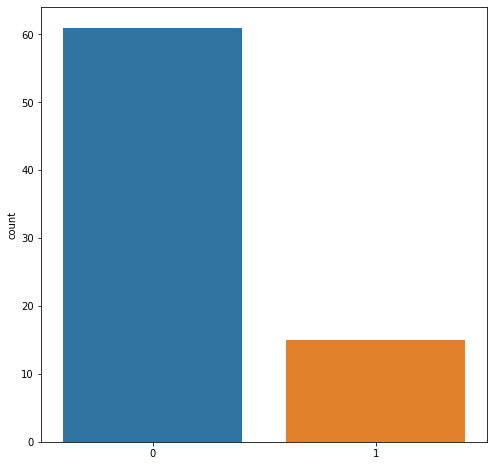

In [9]:
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
ax = sns.countplot(x=y_train, data=df) 
print(df['End'].value_counts())

0    14
1     6
Name: End, dtype: int64


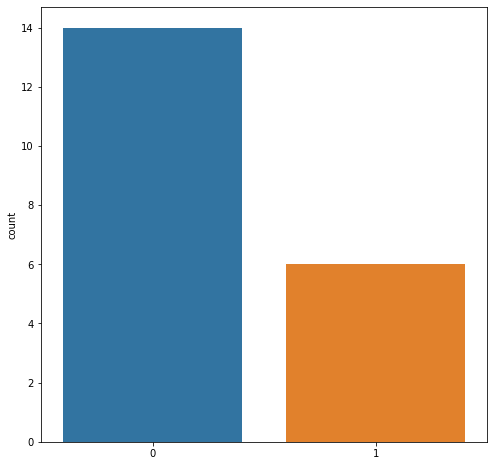

In [10]:
import seaborn as sns
ax = sns.countplot(x=y_test, data=df1)
print(df1['End'].value_counts())

## All the data

In [11]:
df2 = pd.read_csv('E:/Experiments/PeilunHan/LVNC/radiomics/run-new/run-1223/features-new.csv',encoding='gbk')
class_mapping = {label: idx for idx, label in enumerate(np.unique(df2['End']))}
df2['End'] = df2['End'].map(class_mapping)
y = LabelEncoder().fit_transform(df2['End'].values)
X = df2.iloc[:, 4:109].values
print(y.shape)
print(X.shape)
X = stdsc.transform(X)
print(X.shape)

(96,)
(96, 105)
(96, 105)


0    75
1    21
Name: End, dtype: int64


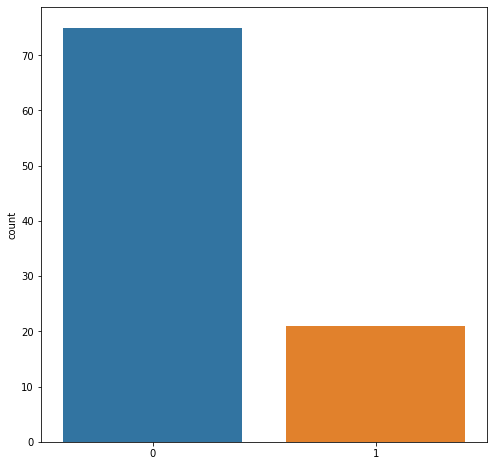

In [12]:
import seaborn as sns
ax = sns.countplot(x=y, data=df2)
print(df2['End'].value_counts())

## Data preprocessing

In [13]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
sm = SMOTE(random_state=11)
X1_train, y1_train = sm.fit_sample(X_train, y_train)

Using TensorFlow backend.


In [14]:
unique, count = np.unique(y1_train, return_counts=True)
y1_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y1_train_smote_value_count

{0: 61, 1: 61}

In [15]:
print(y1_train.shape)
print(X1_train.shape)

(122,)
(122, 105)


In [16]:
new_df = pd.DataFrame(X1_train)
new_df1 = pd.DataFrame(y1_train)
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,103,104
0,0.582496,-1.007975,-0.604772,0.451999,-0.340165,-0.188433,-0.060314,-0.207593,-0.806213,0.580030,...,-0.216695,-0.357507,-1.201537,-1.013781,-0.508122,0.166782,-0.353304,-0.793987,-1.118671,-0.738282
1,0.760525,-0.870875,-0.687730,0.132647,0.786179,0.156162,0.499087,0.446494,0.502974,0.309803,...,-0.303730,-0.262244,0.790189,1.692783,-0.170349,-0.724571,-0.377793,2.104395,0.328747,1.699214
2,0.459020,-1.576866,-1.434643,0.046834,0.521274,0.789372,0.617703,0.591274,-0.306172,0.152717,...,-0.371592,-0.292139,0.401973,-0.536823,-0.122547,-0.193655,0.586769,-0.626620,-0.057614,-0.547245
3,-0.532480,-1.094282,-1.353379,-0.532785,-0.064597,-0.687547,-0.304567,-0.336617,-0.455200,-0.628523,...,-0.396110,-0.313613,1.046092,0.318762,-0.106226,-0.482459,0.852262,0.010658,1.656218,-0.044743
4,1.196272,-1.664024,-1.960826,-0.715975,0.408121,-0.405788,-0.131326,0.031488,-0.286046,-0.437767,...,-0.514157,-0.746931,1.342751,3.528230,-0.888393,-0.820531,0.495732,2.050106,2.227965,1.206827


## Feature Selection

Accuracy: 100.00 % 


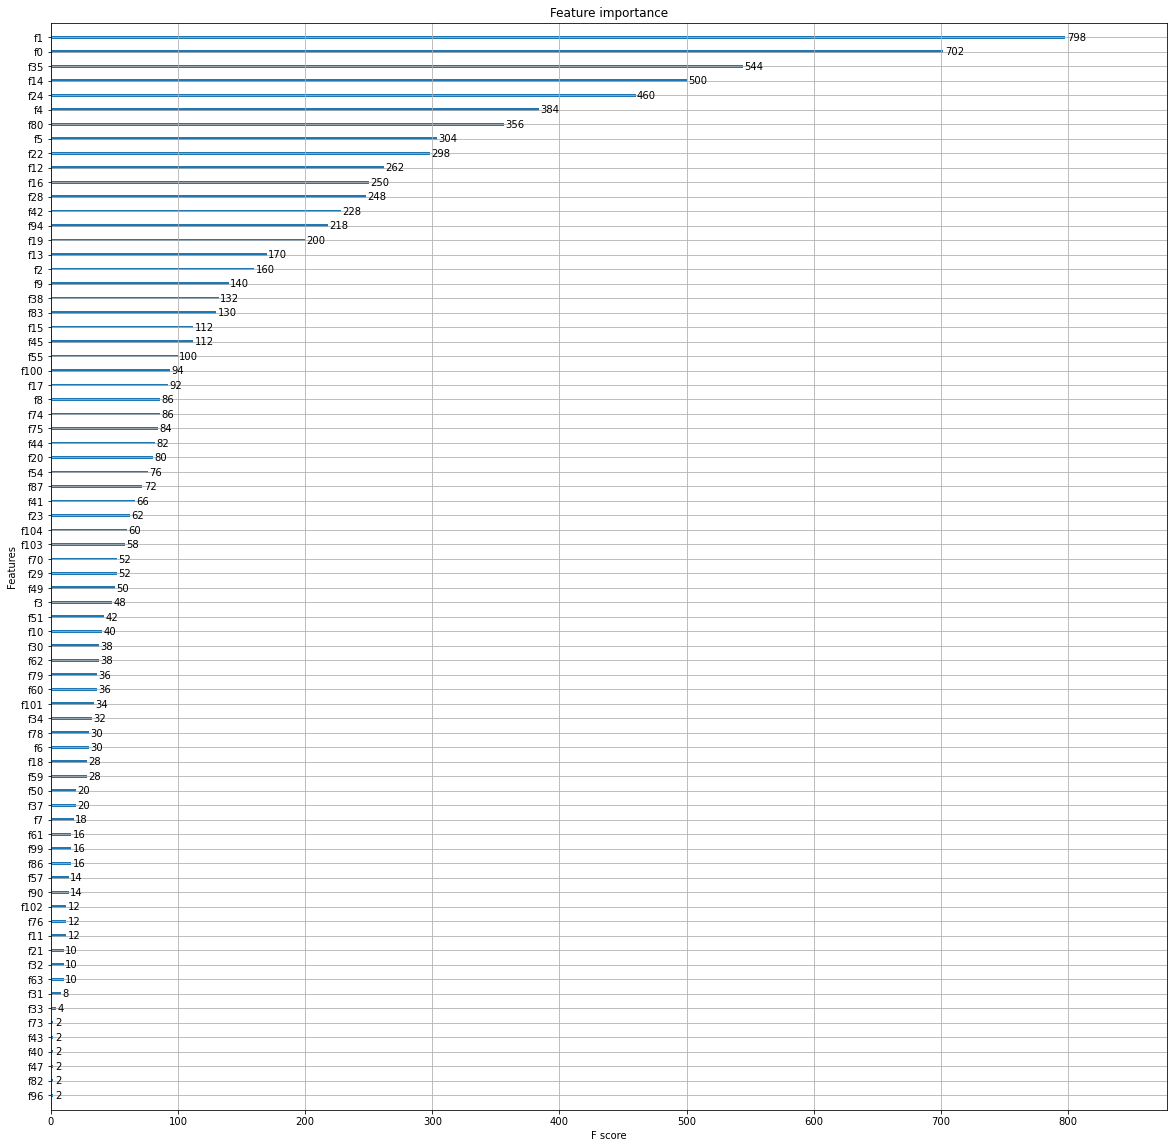

In [17]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 20.0)
# set XGBoost's parameters
params = {
    'booster': 'gbtree',
    #'objective': 'binary:hinge',  #'binary:logistic', 
    'objective':'multi:softmax',
    'eval_metric':'auc',
    'num_class': 2, 
    #'gamma': 0.1,
    'max_depth': 10,
    #'alpha':1,
    'lambda': 1,
    #'subsample': 1,
    #'colsample_bytree': 1,
    #'min_child_weight': 3,
    #'scale_pos_weight':4,
    #'silent': 1,
    'eta': 0.01,
    'seed': 100,
    #'nthread': 4,    
}

plst = params.items()
# trian
dtrain = xgb.DMatrix(X1_train, y1_train)
num_rounds = 500
model = xgb.train(plst, dtrain, num_rounds)

# test
dtest = xgb.DMatrix(X_train)
ans = model.predict(dtest)

# calculate
cnt1 = 0
cnt2 = 0
for i in range(len(y_train)):
    if ans[i] == y_train[i]:
        cnt1 += 1
    else:
        cnt2 += 1

print("Accuracy: %.2f %% " % (100 * cnt1 / (cnt1 + cnt2)))

# show the importance, for feature selection
xgb.plot_importance(model, importance_type='weight')
#plt.savefig('fig2-new.jpg',dpi=1200)
plt.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

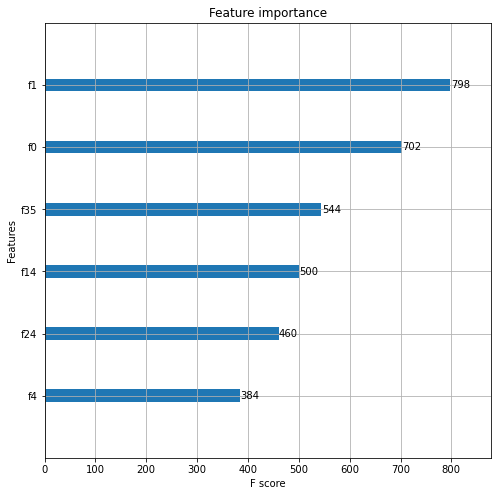

In [18]:
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
xgb.plot_importance(model,max_num_features=6, importance_type='weight') #or gain, cover.
#plt.savefig('fig3.jpg',dpi=1200)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

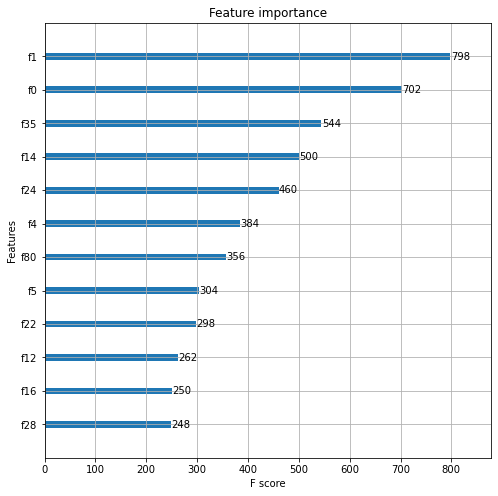

In [19]:
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
xgb.plot_importance(model,max_num_features=12, importance_type='weight') #or gain, cover.
#plt.savefig('fig4-new.jpg',dpi=1200)

In [20]:
feat_labels[[1,0,35,14,24,4,80,5,22,12,16,28]]

Index(['original_shape_Flatness', 'original_shape_Elongation',
       'original_glcm_ClusterShade', 'original_firstorder_10Percentile',
       'original_firstorder_Minimum', 'original_shape_Maximum2DDiameterColumn',
       'original_glszm_SmallAreaEmphasis',
       'original_shape_Maximum2DDiameterRow', 'original_firstorder_Mean',
       'original_shape_SurfaceVolumeRatio', 'original_firstorder_Energy',
       'original_firstorder_Skewness'],
      dtype='object')

In [21]:
X0 = X[:,[1,0,35,14,24,4,80,5,22,12,16,28]]
X1 = X_train[:,[1,0,35,14,24,4,80,5,22,12,16,28]]
X2 = X1_train[:,[1,0,35,14,24,4,80,5,22,12,16,28]]
X3 = X_test[:,[1,0,35,14,24,4,80,5,22,12,16,28]]
y0 = y
y1 = y_train
y2 = y1_train
y3 = y_test

print("the true all data:")
print(X0.shape)
print(y0.shape)
print("the true train data:")
print(X1.shape) #
print(y1.shape)
print("the generate train data:")
print(X2.shape) #
print(y2.shape)
print("the true test data:")
print(X3.shape) #
print(y3.shape)

the true all data:
(96, 12)
(96,)
the true train data:
(76, 12)
(76,)
the generate train data:
(122, 12)
(122,)
the true test data:
(20, 12)
(20,)


In [52]:
# save the data
data_df = pd.DataFrame(X0)
writer = pd.ExcelWriter('nn.xlsx')
data_df.to_excel(writer,'page_1',float_format='%.5f')
writer.save() 

## Select modeling method

In [23]:
clf1 = LogisticRegression(penalty='l2',C=1, multi_class='auto',solver='liblinear',random_state=1)
clf2 = tree.DecisionTreeClassifier(random_state=1)
clf3 = ensemble.RandomForestClassifier(random_state=1)
clf4 = XGBClassifier(random_state=1)
clf5 = svm.SVC(probability=True, random_state=1)

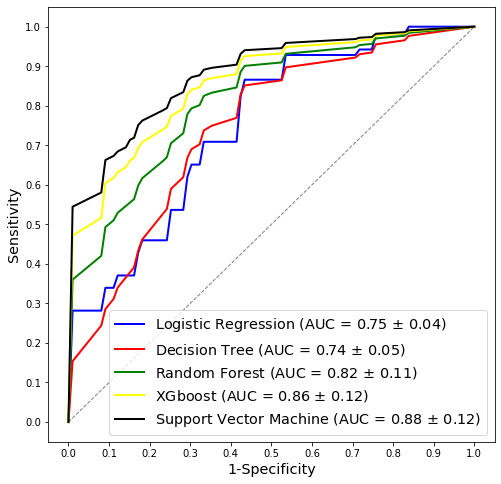

In [24]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import model_selection
from scipy import interp
import matplotlib
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import auc, f1_score, roc_auc_score, roc_curve
from pylab import rcParams

cv = model_selection.ShuffleSplit(n_splits = 4, test_size = 0.2, random_state = 1)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)

for train, test in cv.split(X2, y2):
    probas_ = clf1.fit(X2[train], y2[train]).predict_proba(X2[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y2[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    #optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=tpr, FPR=fpr, threshold=thresholds) ###
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1

plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
#optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=mean_tpr, mean_fpr, threshold=thresholds)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',label=r'Logistic Regression (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#############################################################
for train, test in cv.split(X2, y2):
    probas_ = clf2.fit(X2[train], y2[train]).predict_proba(X2[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y2[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.6)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='red',label=r'Decision Tree (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
################################################################

for train, test in cv.split(X2, y2):
    probas_ = clf3.fit(X2[train], y2[train]).predict_proba(X2[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y2[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.6)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='green',label=r'Random Forest (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#################################################################
for train, test in cv.split(X2, y2):
    probas_ = clf4.fit(X2[train], y2[train]).predict_proba(X2[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y2[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.6)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='yellow',linestyle='-',label=r'XGboost (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#################################################################
for train, test in cv.split(X2, y2):
    probas_ = clf5.fit(X2[train], y2[train]).predict_proba(X2[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y2[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.6)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='black',linestyle='-', label=r'Support Vector Machine (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

#################################################################
#plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
#plt.xlim([-0, 1])
#plt.ylim([-0, 1])
plt.xlabel('1-Specificity', fontsize = 'x-large')
plt.ylabel('Sensitivity', fontsize = 'x-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,
           fontsize = 'x-large'
          )
#plt.plot(optimal_point[0], optimal_point[1], marker='o', color='r')
#plt.text(optimal_point[0], optimal_point[1], f'Threshold:{optimal_th:.2f}')

#plt.savefig('ROC1-new.jpg',dpi=1200)
plt.show()

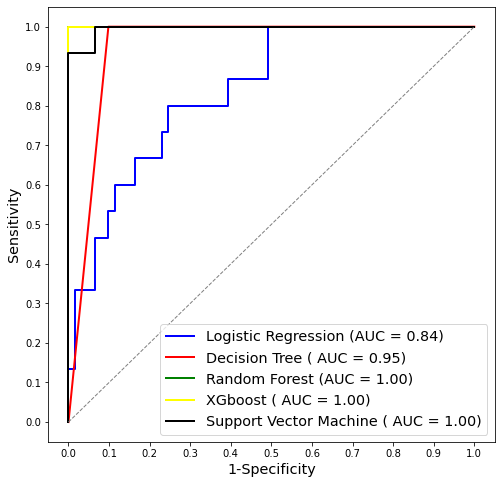

In [25]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))
###################################################################
probas_ = clf1.predict_proba(X1)
fpr, tpr, thresholds = roc_curve(y1, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='b', alpha=1, lw=2, linestyle='-',label='Logistic Regression (AUC = %0.2f)' % roc_auc) 
#plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--',alpha=.6)
###################################################################
probas_ = clf2.predict_proba(X1)
fpr, tpr, thresholds = roc_curve(y1, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='r', alpha=1, lw=2, linestyle='-',label='Decision Tree ( AUC = %0.2f)' % roc_auc) 
###################################################################
probas_ = clf3.predict_proba(X1)
fpr, tpr, thresholds = roc_curve(y1, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='green', alpha=1, lw=2, linestyle='-',label='Random Forest (AUC = %0.2f)' % roc_auc) 
###################################################################
probas_ = clf4.predict_proba(X1)
fpr, tpr, thresholds = roc_curve(y1, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='yellow', alpha=1, lw=2, linestyle='-',label='XGboost ( AUC = %0.2f)' % roc_auc) 
###################################################################
probas_ = clf5.predict_proba(X1)
fpr, tpr, thresholds = roc_curve(y1, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='black', alpha=1, lw=2, linestyle='-',label='Support Vector Machine ( AUC = %0.2f)' % roc_auc) 
###################################################################

plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)
#plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
#plt.xlim([-0, 1])
#plt.ylim([-0, 1])
plt.xlabel('1-Specificity', fontsize = 'x-large')
plt.ylabel('Sensitivity', fontsize = 'x-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,
           fontsize = 'x-large'
          )
#plt.savefig('ROC2.jpg',dpi=1200)
plt.show()

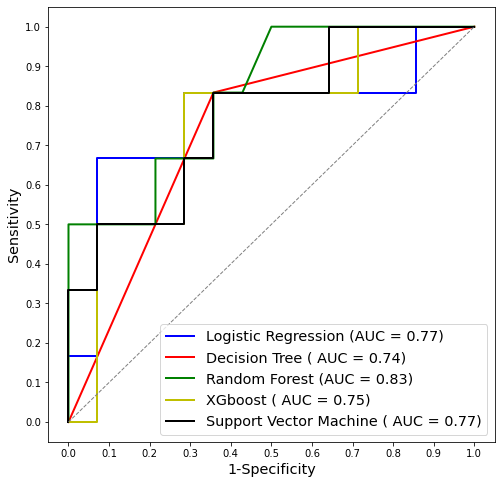

In [26]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))
###################################################################
probas_ = clf1.predict_proba(X3)
fpr, tpr, thresholds = roc_curve(y3, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='b', alpha=1, lw=2, linestyle='-',label='Logistic Regression (AUC = %0.2f)' % roc_auc) 
#plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--',alpha=.6)
###################################################################
probas_ = clf2.predict_proba(X3)
fpr, tpr, thresholds = roc_curve(y3, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='r', alpha=1, lw=2, linestyle='-',label='Decision Tree ( AUC = %0.2f)' % roc_auc) 
###################################################################
probas_ = clf3.predict_proba(X3)
fpr, tpr, thresholds = roc_curve(y3, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='green', alpha=1, lw=2, linestyle='-',label='Random Forest (AUC = %0.2f)' % roc_auc) 
###################################################################
probas_ = clf4.predict_proba(X3)
fpr, tpr, thresholds = roc_curve(y3, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='y', alpha=1, lw=2, linestyle='-',label='XGboost ( AUC = %0.2f)' % roc_auc) 
###################################################################
probas_ = clf5.predict_proba(X3)
fpr, tpr, thresholds = roc_curve(y3, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='black', alpha=1, lw=2, linestyle='-',label='Support Vector Machine ( AUC = %0.2f)' % roc_auc) 

plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)
#plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
#plt.xlim([-0, 1])
#plt.ylim([-0, 1])
plt.xlabel('1-Specificity', fontsize = 'x-large')
plt.ylabel('Sensitivity', fontsize = 'x-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,
           fontsize = 'x-large'
          )
#plt.savefig('B-RFE-ROC3.jpg',dpi=1200)
plt.show()

## Modeling and test

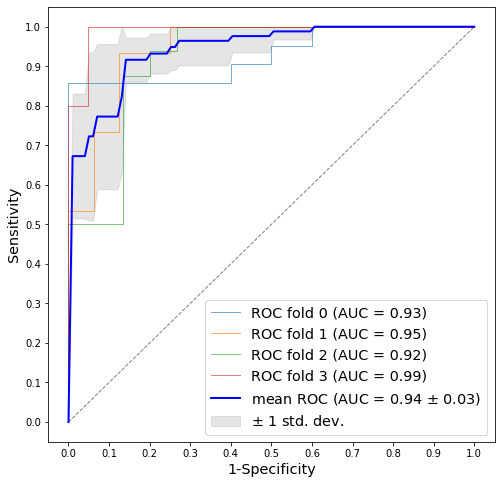

In [28]:
model = svm.SVC(probability=True, random_state=1)

matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
cv = model_selection.ShuffleSplit(n_splits = 4, test_size = 0.25, random_state = 1)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))

for train, test in cv.split(X2, y2):
    probas_ = model.fit(X2[train], y2[train]).predict_proba(X2[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y2[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    #optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=tpr, FPR=fpr, threshold=thresholds) ###
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
#optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=mean_tpr, mean_fpr, threshold=thresholds)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',label=r'mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

plt.xlabel('1-Specificity', fontsize = 'x-large')
plt.ylabel('Sensitivity', fontsize = 'x-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,
           fontsize = 'x-large'
          )
#plt.plot(optimal_point[0], optimal_point[1], marker='o', color='r')
#plt.text(optimal_point[0], optimal_point[1], f'Threshold:{optimal_th:.2f}')

#plt.savefig('ROC3.jpg',dpi=1200)
plt.show()

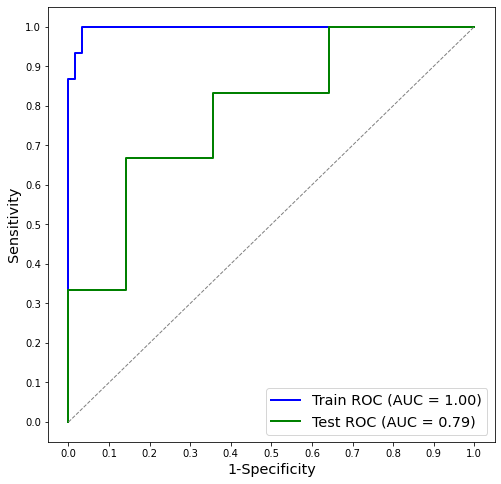

In [29]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))
probas_ = model.predict_proba(X1)
fpr, tpr, thresholds = roc_curve(y1, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='blue', alpha=1, lw=2, linestyle='-',label='Train ROC (AUC = %0.2f)' % roc_auc) 
#plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--',alpha=.6)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)

probas_ = model.predict_proba(X3)
fpr, tpr, thresholds = roc_curve(y3, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='green', alpha=1, lw=2, linestyle='-',label='Test ROC (AUC = %0.2f)' % roc_auc) 
#plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--',alpha=.6)
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)

#plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
#plt.xlim([-0, 1])
#plt.ylim([-0, 1])
plt.xlabel('1-Specificity', fontsize = 'x-large')
plt.ylabel('Sensitivity', fontsize = 'x-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,
           fontsize = 'x-large'
          )
#plt.savefig('ROC4-new.jpg',dpi=1200)
plt.show()

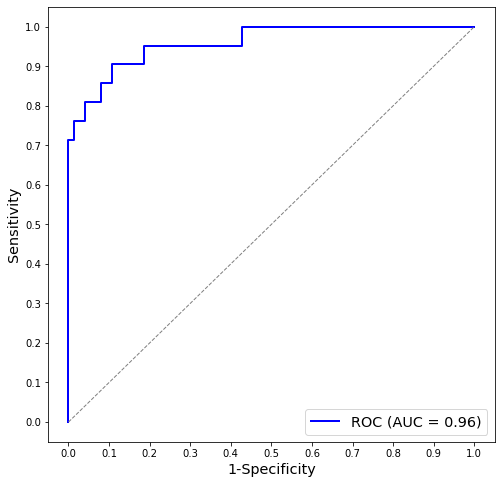

In [38]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))
probas_ = model.predict_proba(X0)
fpr, tpr, thresholds = roc_curve(y0, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='blue', alpha=1, lw=2, linestyle='-',label='ROC (AUC = %0.2f)' % roc_auc) 
#plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--',alpha=.6)
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)

plt.xlabel('1-Specificity', fontsize = 'x-large')
plt.ylabel('Sensitivity', fontsize = 'x-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,
           fontsize = 'x-large'
          )
#plt.savefig('ROC4-new.jpg',dpi=1200)
plt.show()

In [30]:
Y1_Pred = model.predict(X1)
pd.crosstab(pd.Series(Y1_Pred, name = 'Predicted'), 
            pd.Series(df['End'], name = 'Actual'))

Actual,0,1
Predicted,,
0,49,0
1,12,15


In [31]:
Y3_Pred = model.predict(X3)
pd.crosstab(pd.Series(Y3_Pred, name = 'Predicted'), 
            pd.Series(df1['End'], name = 'Actual'))

Actual,0,1
Predicted,,
0,8,1
1,6,5


In [34]:
Y0_Pred = model.predict(X0)
pd.crosstab(pd.Series(Y0_Pred, name = 'Predicted'), 
            pd.Series(df2['End'], name = 'Actual'))

Actual,0,1
Predicted,,
0,57,1
1,18,20


In [32]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

print("Accuracy = " , accuracy_score(y1, Y1_Pred))
print("Precision = " ,precision_score(y1, Y1_Pred))
print("Recall = " ,recall_score(y1, Y1_Pred))
print("F1 Score = " ,f1_score(y1, Y1_Pred))

Accuracy =  0.8421052631578947
Precision =  0.5555555555555556
Recall =  1.0
F1 Score =  0.7142857142857143


In [33]:
print("Accuracy = " , accuracy_score(y3, Y3_Pred))
print("Precision = " ,precision_score(y3, Y3_Pred))
print("Recall = " ,recall_score(y3, Y3_Pred))
print("F1 Score = " ,f1_score(y3, Y3_Pred))

Accuracy =  0.65
Precision =  0.45454545454545453
Recall =  0.8333333333333334
F1 Score =  0.5882352941176471


In [35]:
print("Accuracy = " , accuracy_score(y0, Y0_Pred))
print("Precision = " ,precision_score(y0, Y0_Pred))
print("Recall = " ,recall_score(y0, Y0_Pred))
print("F1 Score = " ,f1_score(y0, Y0_Pred))

Accuracy =  0.8020833333333334
Precision =  0.5263157894736842
Recall =  0.9523809523809523
F1 Score =  0.6779661016949152


In [36]:
predictions = model.predict_proba(X0)
predictions

array([[0.63757613, 0.36242387],
       [0.43633839, 0.56366161],
       [0.90126861, 0.09873139],
       [0.09147088, 0.90852912],
       [0.91168505, 0.08831495],
       [0.94228549, 0.05771451],
       [0.97751201, 0.02248799],
       [0.31965973, 0.68034027],
       [0.97085169, 0.02914831],
       [0.11473767, 0.88526233],
       [0.98350228, 0.01649772],
       [0.57349227, 0.42650773],
       [0.98348015, 0.01651985],
       [0.95627598, 0.04372402],
       [0.08061815, 0.91938185],
       [0.38743136, 0.61256864],
       [0.96551019, 0.03448981],
       [0.09603219, 0.90396781],
       [0.92475286, 0.07524714],
       [0.16125912, 0.83874088],
       [0.10823895, 0.89176105],
       [0.99350712, 0.00649288],
       [0.93748642, 0.06251358],
       [0.71469637, 0.28530363],
       [0.82110862, 0.17889138],
       [0.19052452, 0.80947548],
       [0.08489666, 0.91510334],
       [0.98349174, 0.01650826],
       [0.93816011, 0.06183989],
       [0.98347136, 0.01652864],
       [0.

In [51]:
# save the data
pre_df = pd.DataFrame(predictions)
writer = pd.ExcelWriter('radiomics_pre.xlsx')
pre_df.to_excel(writer,'page_1',float_format='%.5f')
writer.save() 